<a href="https://colab.research.google.com/github/rizwan08-bit/rizwan08/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target

In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

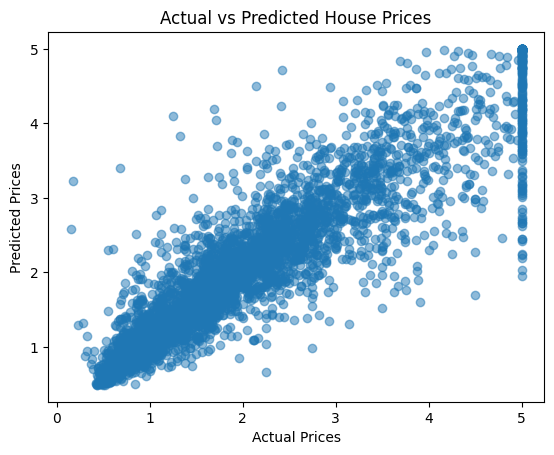

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report

# Regression



mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


# Classification (using existing dataframe and splitting it for classification)
# Assuming 'Price' needs to be categorized for classification.
# Replace this with your actual categorization logic.
# Example: Classify prices into low, medium, and high.
df['Price_Category'] = pd.cut(df['Price'], bins=3, labels=['low', 'medium', 'high'])

X = df.drop(columns=['Price', 'Price_Category'])  # Features
y = df['Price_Category']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
cm


Regression Metrics:
Mean Squared Error (MSE): 0.2553684927247781
Root Mean Squared Error (RMSE): 0.5053399773665033
R-squared (R2): 0.8051230593157366

Classification Report:
              precision    recall  f1-score   support

        high       0.84      0.66      0.74       579
         low       0.88      0.90      0.89      2031
      medium       0.77      0.81      0.79      1518

    accuracy                           0.83      4128
   macro avg       0.83      0.79      0.81      4128
weighted avg       0.83      0.83      0.83      4128


Confusion Matrix:


array([[ 382,   21,  176],
       [   4, 1834,  193],
       [  71,  224, 1223]])

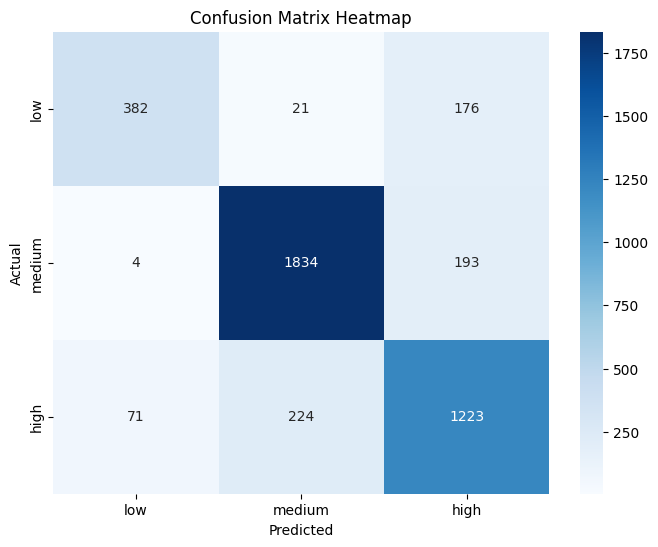

In [ ]:


# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


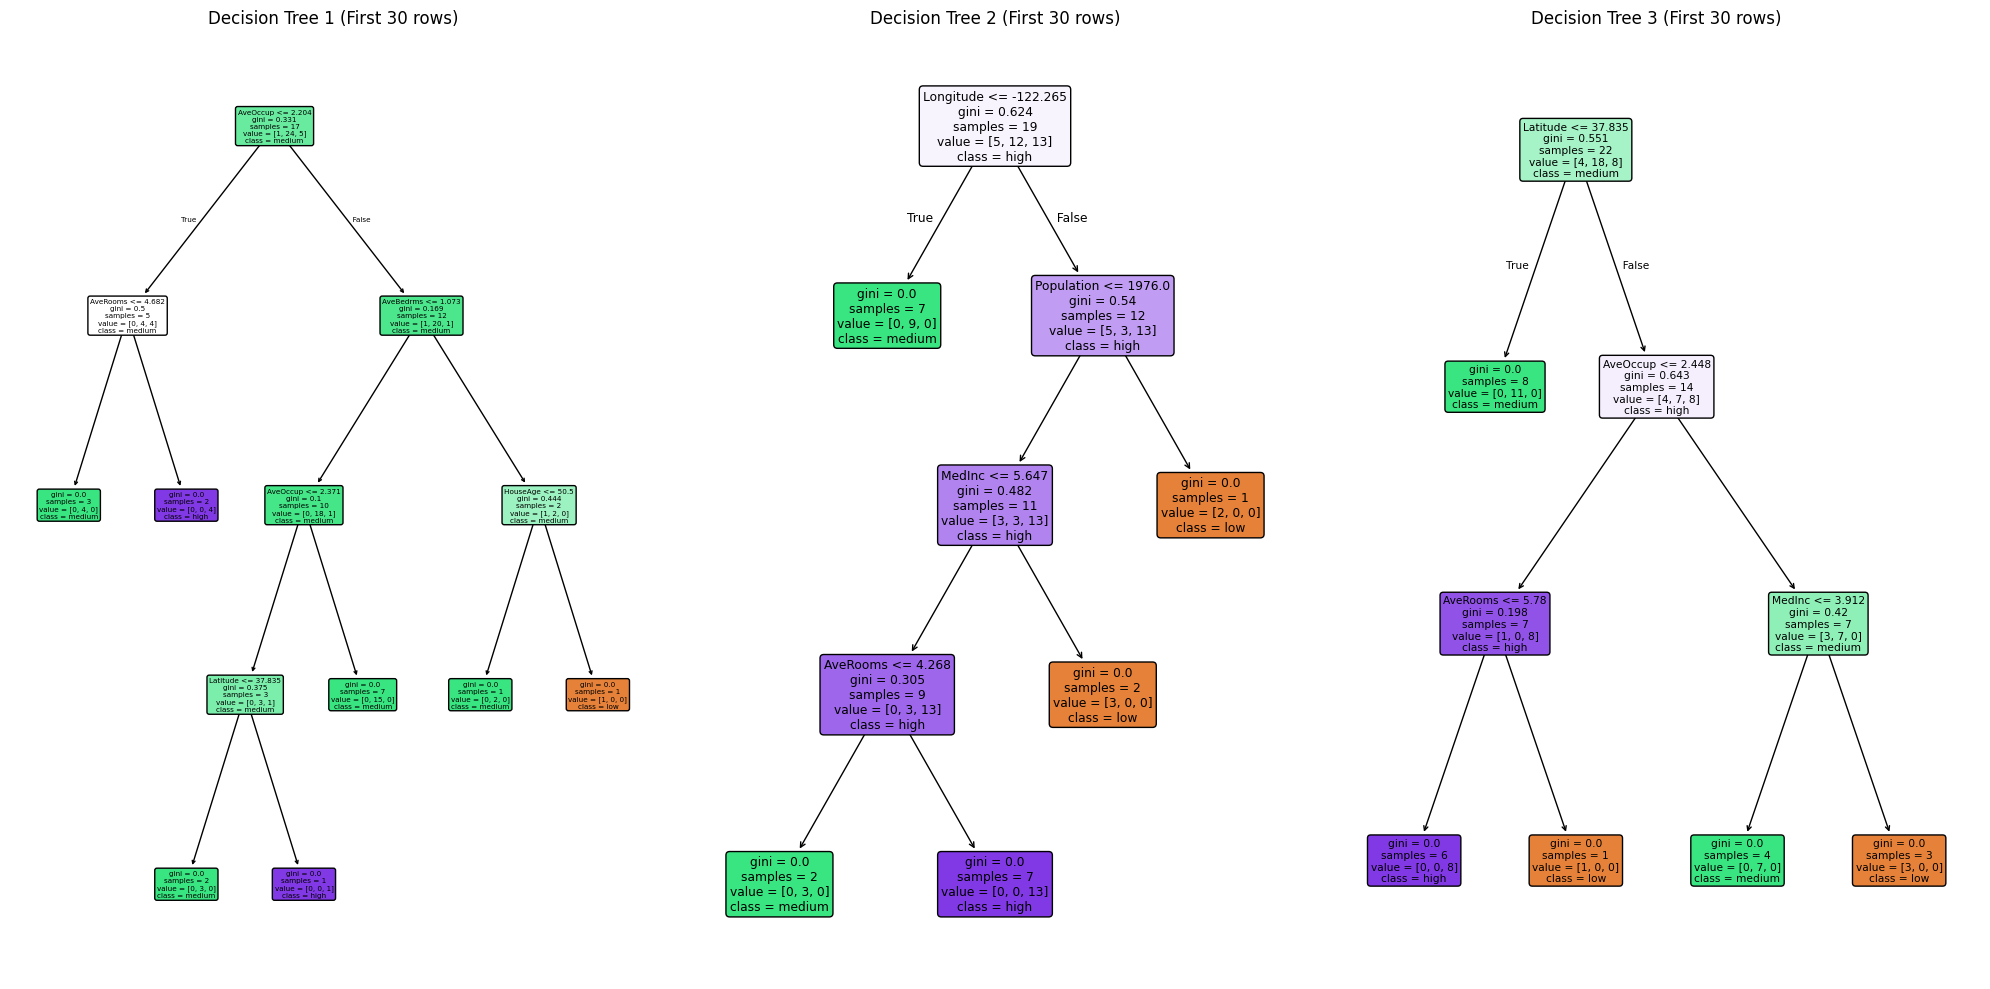

In [ ]:


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming rf_classifier is your trained RandomForestClassifier
# and you want to plot the first three trees from the first 30 rows

# Assuming X_train and y_train are your training data
X_train_subset = X_train.head(30)
y_train_subset = y_train.head(30)

rf_classifier_subset = RandomForestClassifier(random_state=42)
rf_classifier_subset.fit(X_train_subset, y_train_subset)

plt.figure(figsize=(20, 10))
for i in range(3):  # Plot the first three trees
    plt.subplot(1, 3, i+1) # Create subplots for each tree
    plot_tree(rf_classifier_subset.estimators_[i],
              filled=True,
              feature_names=X.columns,
              class_names=['low', 'medium', 'high'],
              rounded=True)
    plt.title(f"Decision Tree {i+1} (First 30 rows)")
plt.tight_layout() # Adjusts the layout to prevent overlapping
plt.show()
